In [1]:
from mltrainer import CategorizerTrainer
from mlclassifier import Categorizer
from mlpreprocessor import Preprocessor
%matplotlib inline

In [2]:
categories = ['bad_habits', 'education', 'alcohol', 'animals']
# inflicted_words_path = './inflicted_words'
methods = ['SVC', 'MultinomialNB']
features = ['words_raw']
train_data_path = './train.txt'
test_data_path = './test.txt'
model_save_path = './models_categories_nltk'

In [3]:
preprocessor = Preprocessor(tokenization='nltk')
print(preprocessor._tokenization)
preprocessor.prepare_data(train_data_path, categories, features)
train_data = preprocessor.data
preprocessor.balance_data()
train_data_balanced = preprocessor.data_balanced

nltk


bad_habits: zero=46159, one=16376 
education: zero=45721, one=16814 
alcohol: zero=47164, one=15371 
animals: zero=48432, one=14103 


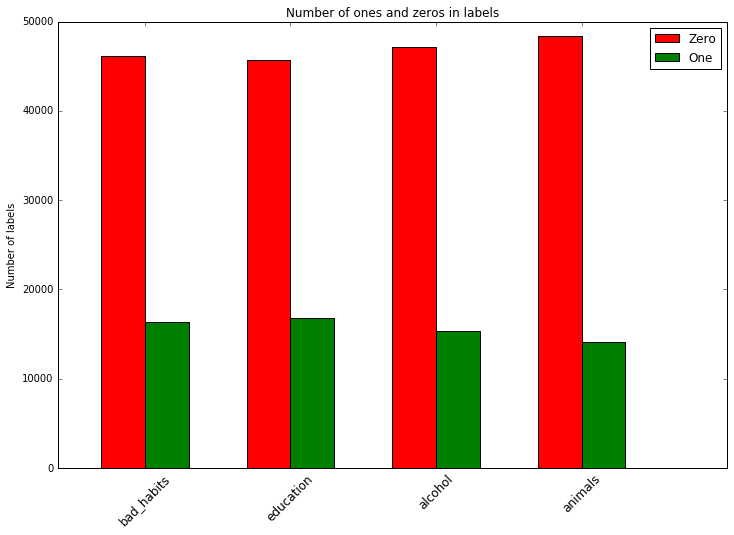

In [4]:
preprocessor.print_statistic()
preprocessor.draw_statistic()

bad_habits: zero=16376, one=16376 
education: zero=16814, one=16814 
alcohol: zero=15371, one=15371 
animals: zero=14103, one=14103 


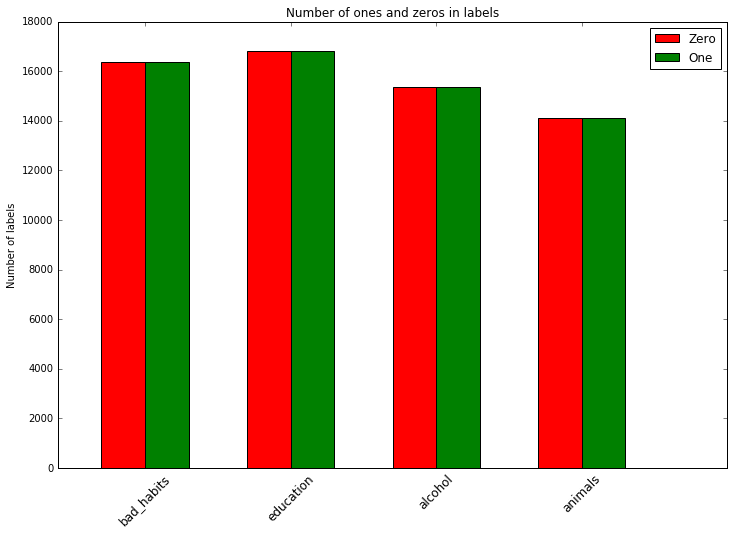

In [5]:
preprocessor.print_statistic(data_balanced=True)
preprocessor.draw_statistic(data_balanced=True)

In [6]:
trainer1 = CategorizerTrainer()
# trainer1.set_inflicted_words(inflicted_words_path)
trainer1.fit(train_data_balanced, methods, categories, features)
trainer1.save_models(model_save_path)

In [7]:
preprocessor.prepare_data(test_data_path, categories, features)
test_data = preprocessor.data
preprocessor.balance_data()
test_data_balanced = preprocessor.data_balanced

bad_habits: zero=11717, one=3917 
education: zero=11247, one=4387 
alcohol: zero=11820, one=3814 
animals: zero=12094, one=3540 


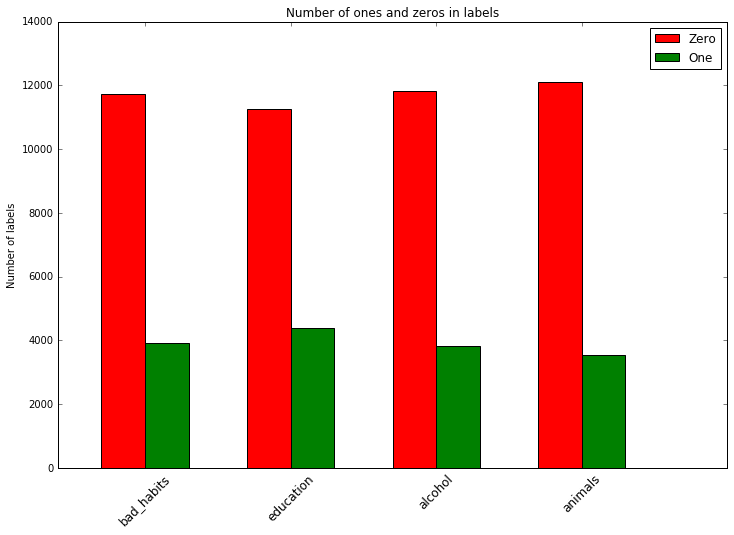

In [8]:
preprocessor.print_statistic()
preprocessor.draw_statistic()

bad_habits: zero=3917, one=3917 
education: zero=4387, one=4387 
alcohol: zero=3814, one=3814 
animals: zero=3540, one=3540 


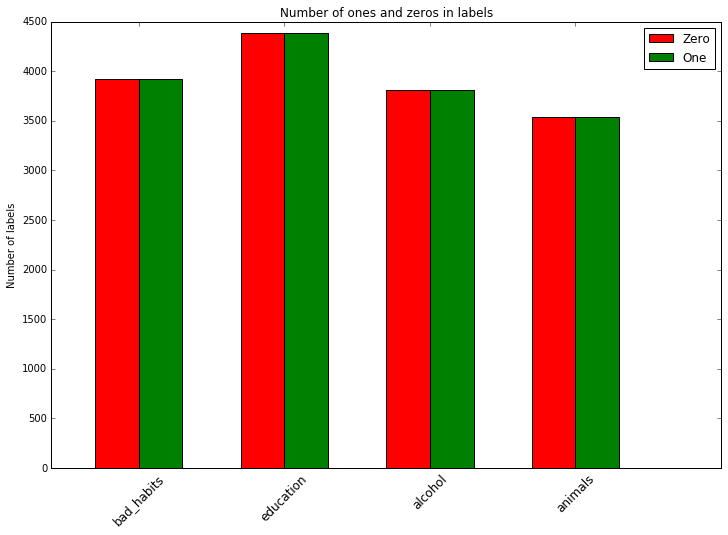

In [9]:
preprocessor.print_statistic(data_balanced=True)
preprocessor.draw_statistic(data_balanced=True)

In [10]:
trainer1.evaluate_models(test_data_balanced, save_metrics=True)
trainer1.print_metrics()

Model method: MultinomialNB
Category: education
correct=8187 rc=0.924549806245726 f1=0.9325209794229222 confusion_matrix=[[4131, 256], [331, 4056]] acc=0.9330977889218145 pr=0.9406307977736549 total=8774
Category: bad_habits
correct=7180 rc=0.9157518509063058 f1=0.9164537557485948 confusion_matrix=[[3593, 324], [330, 3587]] acc=0.9165177431707939 pr=0.9171567374073127 total=7834
Category: alcohol
correct=7111 rc=0.9237021499737809 f1=0.9316408832473886 confusion_matrix=[[3588, 226], [291, 3523]] acc=0.9322233875196644 pr=0.9397172579354495 total=7628
Category: animals
correct=6616 rc=0.9271186440677966 f1=0.9339783722253843 confusion_matrix=[[3334, 206], [258, 3282]] acc=0.9344632768361582 pr=0.9409403669724771 total=7080


Model method: SVC
Category: education
correct=8251 rc=0.9054023250512879 f1=0.9382307783158144 confusion_matrix=[[4279, 108], [415, 3972]] acc=0.9403920674720766 pr=0.9735294117647059 total=8774
Category: bad_habits
correct=7305 rc=0.9111564973193771 f1=0.9310029998

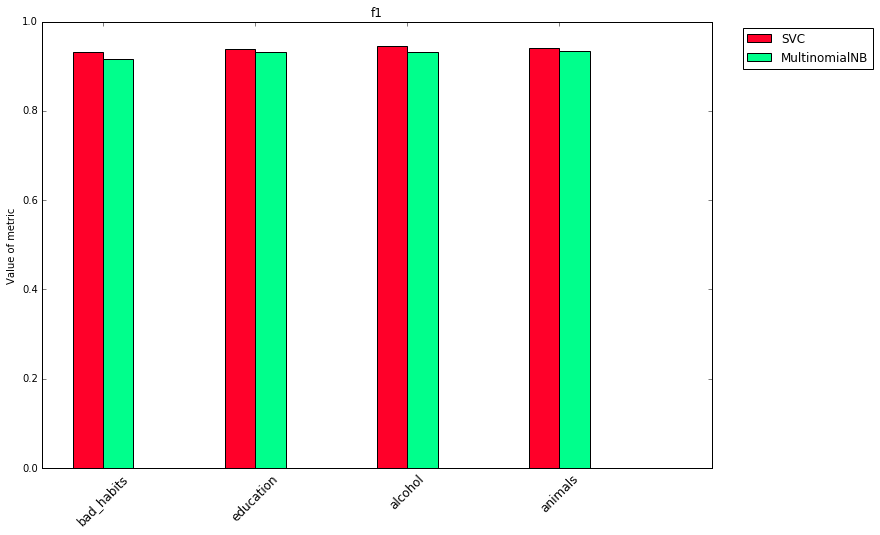

In [11]:
trainer1.draw_metrics('f1')

In [12]:
trainer2 = CategorizerTrainer()
trainer2.load_models(model_save_path)
print(trainer2._tokenization)

nltk


In [13]:
preprocessor2 = Preprocessor(tokenization='nltk')
print(preprocessor2._tokenization)
preprocessor2.prepare_data(test_data_path, categories, features)
test_data2= preprocessor2.data

trainer2.evaluate_models(test_data2)
trainer2.print_metrics()

nltk
Model method: MultinomialNB
Category: education
correct=14610 rc=0.9318440847959881 f1=0.888695652173913 confusion_matrix=[[10522, 725], [299, 4088]] acc=0.934501727005245 pr=0.8493662996052358 total=15634
Category: bad_habits
correct=14233 rc=0.9251978555016594 f1=0.8380159556018036 confusion_matrix=[[10609, 1108], [293, 3624]] acc=0.9103876167327619 pr=0.7658495350803043 total=15634
Category: alcohol
correct=14594 rc=0.9302569480859989 f1=0.8721730580137659 confusion_matrix=[[11046, 774], [266, 3548]] acc=0.9334783164897019 pr=0.8209162424803331 total=15634
Category: animals
correct=14671 rc=0.9327683615819209 f1=0.8727368838377164 confusion_matrix=[[11369, 725], [238, 3302]] acc=0.9384034795957529 pr=0.8199652346660045 total=15634


Model method: SVC
Category: education
correct=14918 rc=0.909049464326419 f1=0.917625402669121 confusion_matrix=[[10930, 317], [399, 3988]] acc=0.9542023794294486 pr=0.9263646922183507 total=15634
Category: bad_habits
correct=14673 rc=0.9149859586418

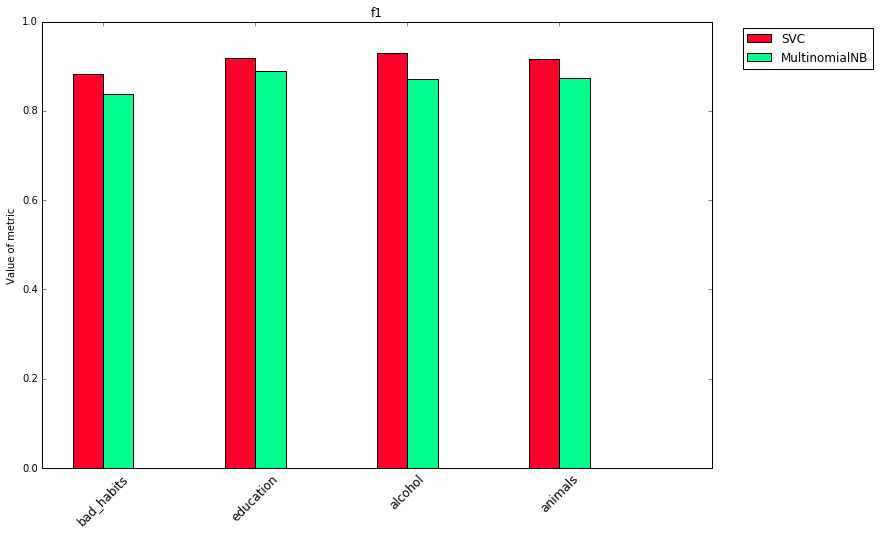

In [14]:
trainer2.draw_metrics('f1')